Kidney Disease Classifier Using XGBoost Algorithm
- Data Reading 
- Data Cleaning
- Converting datatypes
- Exploratory Data Analysis
- Feature Encoding
- Feature Selection
- Implementing algorithm
- Evaluation metric to find accuracy

In [2]:
pip install seaborn

     |████████████████████████████████| 285 kB 4.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [13]:
df = pd.read_csv('kidney_disease.csv')
print(df.head())

   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]


In [88]:
df.describe()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [89]:
df.shape

(400, 25)

In [ ]:
#changing column name user friendly

In [22]:
column_name = pd.read_csv('data_description.txt',sep='-')
column_name = column_name.reset_index()

In [23]:
column_name.columns = ['cols','abb_col_names']

df.columns = column_name['abb_col_names'].values

In [24]:
def convertdt(df,feature):
    df[feature] = pd.to_numeric(df[feature],errors='coerce')
feature = ['red blood cell count','white blood cell count','packed cell volume']

In [25]:
for i in feature:
    convertdt(df,i)
df.drop('id',axis=1,inplace=True)


In [26]:
print(df.head())

    age  blood pressure  specific gravity  albumin  sugar red blood cells  \
0  48.0            80.0             1.020      1.0    0.0             NaN   
1   7.0            50.0             1.020      4.0    0.0             NaN   
2  62.0            80.0             1.010      2.0    3.0          normal   
3  48.0            70.0             1.005      4.0    0.0          normal   
4  51.0            80.0             1.010      2.0    0.0          normal   

   pus cell pus cell clumps    bacteria  blood glucose random  ...  \
0    normal      notpresent  notpresent                 121.0  ...   
1    normal      notpresent  notpresent                   NaN  ...   
2    normal      notpresent  notpresent                 423.0  ...   
3  abnormal         present  notpresent                 117.0  ...   
4    normal      notpresent  notpresent                 106.0  ...   

   packed cell volume  white blood cell count  red blood cell count  \
0                44.0                  7800.0

In [ ]:
#DATA CLEANING

In [27]:
def extract_cat_num(df):
    cat_col = [col for col in df.columns if df[col].dtype=='object']
    num_col = [col for col in df.columns if df[col].dtype!='object']
    return cat_col,num_col
cat_col,num_col = extract_cat_num(df)

In [28]:
for col in cat_col:
    print('{} has {} values'.format(col,df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values


 pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values


coronary artery disease has ['no' 'yes' '\tno' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'ckd\t' 'notckd'] values




In [29]:
df['diabetes mellitus']=df['diabetes mellitus'].replace(to_replace={'\tno': 'no','\tyes':'yes' })
df['coronary artery disease']=df['coronary artery disease'].replace(to_replace={'\tno': 'no'})
df['class']=df['class'].replace(to_replace={'ckd\t': 'ckd'})

In [30]:
for col in cat_col:
    print('{} has {} values'.format(col,df[col].unique()))
    print('\n')

red blood cells has [nan 'normal' 'abnormal'] values


 pus cell has ['normal' 'abnormal' nan] values


pus cell clumps has ['notpresent' 'present' nan] values


bacteria has ['notpresent' 'present' nan] values


ypertension has ['yes' 'no' nan] values


diabetes mellitus has ['yes' 'no' ' yes' nan] values


coronary artery disease has ['no' 'yes' nan] values


appetite has ['good' 'poor' nan] values


pedal edema has ['no' 'yes' nan] values


anemia has ['no' 'yes' nan] values


class has ['ckd' 'notckd'] values




In [31]:
print(len(num_col))

14


In [ ]:
#Exploratary Data Analysis

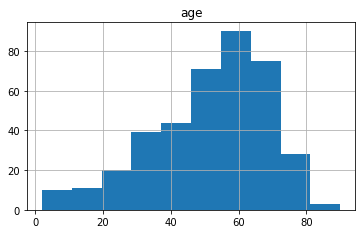

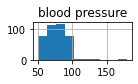

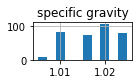

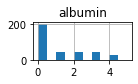

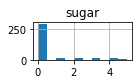

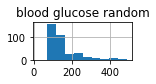

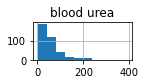

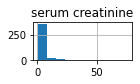

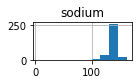

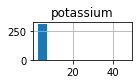

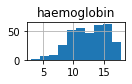

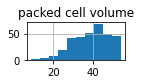

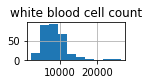

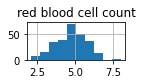

In [32]:
plt.figure(figsize=(20,20))
for i,feature  in enumerate(num_col):
    plt.subplot(5,3,i+1)
    df[feature].hist()
    plt.title(feature)
    plt.show()

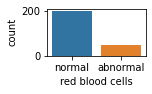

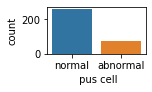

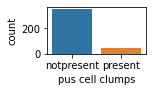

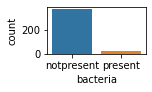

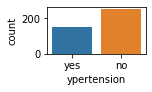

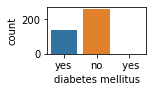

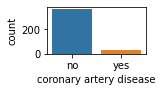

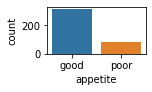

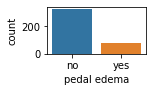

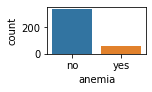

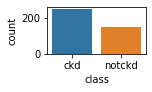

In [33]:
for i,feature in enumerate(cat_col):
    plt.subplot(4,3,i+1)
    sns.countplot(df[feature])
    plt.show()

In [34]:
plt.figure(figsize=(20,20))
df.corr()

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,haemoglobin,packed cell volume,white blood cell count,red blood cell count
age,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
blood pressure,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
specific gravity,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
albumin,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
sugar,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
blood glucose random,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
blood urea,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
serum creatinine,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sodium,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873
potassium,0.058377,0.075151,-0.072787,0.129038,0.219450,0.066966,0.357049,0.326107,0.097887,1.000000,-0.133746,-0.163182,-0.105576,-0.158309


<Figure size 1440x1440 with 0 Axes>

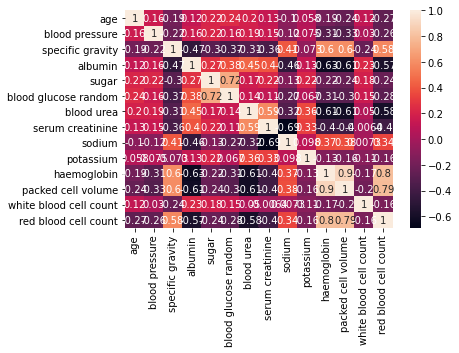

In [35]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [36]:
print(df.groupby(['red blood cells','class'])['red blood cell count'].agg(['count','mean','median','min','max']))

                        count      mean  median  min  max
red blood cells class                                    
abnormal        ckd        25  3.832000     3.7  2.5  5.6
normal          ckd        40  3.782500     3.8  2.1  8.0
                notckd    134  5.368657     5.3  4.4  6.5


In [37]:
pip install plotly

     |████████████████████████████████| 20.6 MB 4.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [38]:
import plotly.express as xp

In [39]:
print(df.columns)

Index(['age', 'blood pressure', 'specific gravity', 'albumin', 'sugar',
       'red blood cells', ' pus cell', 'pus cell clumps', 'bacteria',
       'blood glucose random', 'blood urea', 'serum creatinine', 'sodium',
       'potassium', 'haemoglobin', 'packed cell volume',
       'white blood cell count', 'red blood cell count', 'ypertension',
       'diabetes mellitus', 'coronary artery disease', 'appetite',
       'pedal edema', 'anemia', 'class'],
      dtype='object')


In [44]:
def violin(col):
    fig = xp.violin(df,y=col,x='class',color='class')
    return fig.show()
def scatter(col1,col2):
    fig = xp.scatter(df,x=col1,y=col2,color='class')
    return fig.show()
def kde_plot(feature):
    grid = sns.FacetGrid(df,hue='class',aspect=2)
    grid.map(sns.kdeplot,feature)
    grid.add_legend()


In [45]:
violin('red blood cell count')

In [46]:
scatter('haemoglobin','packed cell volume')

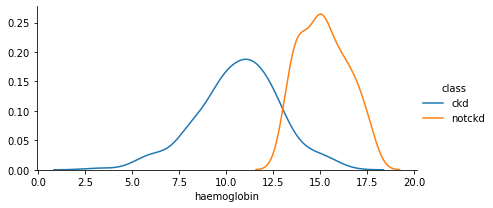

In [47]:
kde_plot('haemoglobin')

In [48]:
print(df.isna().sum().sort_values(ascending=False))

red blood cells            152
red blood cell count       131
white blood cell count     106
potassium                   88
sodium                      87
packed cell volume          71
 pus cell                   65
haemoglobin                 52
sugar                       49
specific gravity            47
albumin                     46
blood glucose random        44
blood urea                  19
serum creatinine            17
blood pressure              12
age                          9
bacteria                     4
pus cell clumps              4
ypertension                  2
diabetes mellitus            2
coronary artery disease      2
anemia                       1
appetite                     1
pedal edema                  1
class                        0
dtype: int64


In [ ]:
#handiling missing values

In [49]:
data = df.copy()

In [50]:
def random_values_fill(feature):
    random_values = data[feature].dropna().sample(data[feature].isnull().sum())
    random_values.index = data[data[feature].isnull()].index
    data.loc[data[feature].isnull(),feature] = random_values

In [51]:
print(data[num_col].isnull().sum())

age                         9
blood pressure             12
specific gravity           47
albumin                    46
sugar                      49
blood glucose random       44
blood urea                 19
serum creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed cell volume         71
white blood cell count    106
red blood cell count      131
dtype: int64


In [52]:
for col in num_col:
    random_values_fill(col)

In [53]:
random_values_fill('red blood cells')
random_values_fill(' pus cell')

In [54]:
def compute_mode(feature):
    mode = data[feature].mode()[0]
    data[feature] = data[feature].fillna(mode)
for col in cat_col:
    compute_mode(col)

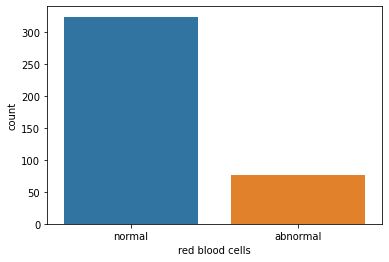

In [55]:
sns.countplot(x='red blood cells',data=data)
plt.show()

In [ ]:
#FEATURE ENCODING

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in cat_col:
    data[col] = le.fit_transform(data[col])

In [57]:
print(data['red blood cells'].head())

0    1
1    1
2    1
3    1
4    1
Name: red blood cells, dtype: int64


In [ ]:
#feature selection

In [58]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
ind_col = [col for col in data.columns if col!='class']
dep_col = 'class'
x=data[ind_col]
y=data['class']

In [59]:
print(x.head())

    age  blood pressure  specific gravity  albumin  sugar  red blood cells  \
0  48.0            80.0             1.020      1.0    0.0                1   
1   7.0            50.0             1.020      4.0    0.0                1   
2  62.0            80.0             1.010      2.0    3.0                1   
3  48.0            70.0             1.005      4.0    0.0                1   
4  51.0            80.0             1.010      2.0    0.0                1   

    pus cell  pus cell clumps  bacteria  blood glucose random  ...  \
0          1                0         0                 121.0  ...   
1          1                0         0                 114.0  ...   
2          1                0         0                 423.0  ...   
3          0                1         0                 117.0  ...   
4          1                0         0                 106.0  ...   

   haemoglobin  packed cell volume  white blood cell count  \
0         15.4                44.0              

In [60]:
oredered_rank = SelectKBest(score_func=chi2,k=20) #get scores all all cols and find which has more
ordered_features = oredered_rank.fit(x,y)

In [61]:
print(ordered_features)

SelectKBest(k=20, score_func=<function chi2 at 0x7f57eb36aea0>)


In [62]:
print(ordered_features.scores_)

[1.12326557e+02 7.77761047e+01 5.21041769e-03 2.48356935e+02
 1.03623970e+02 9.24773663e+00 1.51510248e+01 2.52000000e+01
 1.32000000e+01 2.38270541e+03 2.34606421e+03 3.52892519e+02
 3.35246305e+01 2.84140797e+00 1.30152493e+02 3.09639583e+02
 1.45179498e+04 2.28161857e+01 8.82000000e+01 2.04392523e+01
 2.04000000e+01 4.92000000e+01 4.56000000e+01 3.60000000e+01]


In [63]:
datascores = pd.DataFrame(ordered_features.scores_,columns=['scores'])
print(datascores)

          scores
0     112.326557
1      77.776105
2       0.005210
3     248.356935
4     103.623970
5       9.247737
6      15.151025
7      25.200000
8      13.200000
9    2382.705412
10   2346.064210
11    352.892519
12     33.524630
13      2.841408
14    130.152493
15    309.639583
16  14517.949820
17     22.816186
18     88.200000
19     20.439252
20     20.400000
21     49.200000
22     45.600000
23     36.000000


In [64]:
dfcols = pd.DataFrame(x.columns)
print(dfcols)

                          0
0                       age
1            blood pressure
2          specific gravity
3                   albumin
4                     sugar
5           red blood cells
6                  pus cell
7           pus cell clumps
8                  bacteria
9      blood glucose random
10               blood urea
11         serum creatinine
12                   sodium
13                potassium
14              haemoglobin
15       packed cell volume
16   white blood cell count
17     red blood cell count
18              ypertension
19        diabetes mellitus
20  coronary artery disease
21                 appetite
22              pedal edema
23                   anemia


In [65]:
featured_rank = pd.concat([dfcols,datascores],axis=1)
print(featured_rank)

                          0        scores
0                       age    112.326557
1            blood pressure     77.776105
2          specific gravity      0.005210
3                   albumin    248.356935
4                     sugar    103.623970
5           red blood cells      9.247737
6                  pus cell     15.151025
7           pus cell clumps     25.200000
8                  bacteria     13.200000
9      blood glucose random   2382.705412
10               blood urea   2346.064210
11         serum creatinine    352.892519
12                   sodium     33.524630
13                potassium      2.841408
14              haemoglobin    130.152493
15       packed cell volume    309.639583
16   white blood cell count  14517.949820
17     red blood cell count     22.816186
18              ypertension     88.200000
19        diabetes mellitus     20.439252
20  coronary artery disease     20.400000
21                 appetite     49.200000
22              pedal edema     45

In [66]:
featured_rank.columns=['features','scores']

In [67]:
selected_cols = featured_rank.nlargest(10,'scores')['features'].values
xnew = data[selected_cols]

In [68]:
print(xnew.head())

   white blood cell count  blood glucose random  blood urea  serum creatinine  \
0                  7800.0                 121.0        36.0               1.2   
1                  6000.0                 114.0        18.0               0.8   
2                  7500.0                 423.0        53.0               1.8   
3                  6700.0                 117.0        56.0               3.8   
4                  7300.0                 106.0        26.0               1.4   

   packed cell volume  albumin  haemoglobin   age  sugar  ypertension  
0                44.0      1.0         15.4  48.0    0.0            1  
1                38.0      4.0         11.3   7.0    0.0            0  
2                31.0      2.0          9.6  62.0    3.0            0  
3                32.0      4.0         11.2  48.0    0.0            1  
4                35.0      2.0         11.6  51.0    0.0            0  


In [69]:
print(xnew.shape)

(400, 10)


In [70]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(xnew,y,test_size=0.3,random_state=0)

In [71]:
pip install xgboost

     |████████████████████████████████| 166.7 MB 25 kB/s s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [72]:
from xgboost import XGBClassifier

In [82]:
classifier= XGBClassifier(base_score=0.5, booster='gbtree',
              learning_rate=0.25, n_estimators=100, n_jobs=4,)
classifier.fit(xtrain,ytrain)

[14:16:54] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [83]:
ypred = classifier.predict(xtest)

In [84]:
ypred

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [85]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [90]:
accuracy_score(ytest,ypred)

0.9666666666666667

In [ ]:
#Got accuracy between 95-98%